In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import yaml
import argparse
import joblib

In [3]:
df_ = pd.read_csv('../data/raw/car_price_prediction.csv')
df_.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
# os.makedirs('C:/Users/Ayo Agbaje/Desktop/ML-Pipelines/data/raw')
# os.makedirs('C:/Users/Ayo Agbaje/Desktop/ML-Pipelines/data/processed')
# os.makedirs('C:/Users/Ayo Agbaje/Desktop/ML-Pipelines/models')
# os.makedirs('C:/Users/Ayo Agbaje/Desktop/ML-Pipelines/notebooks')
# os.makedirs('C:/Users/Ayo Agbaje/Desktop/ML-Pipelines/reports/figures')
# os.makedirs('C:/Users/Ayo Agbaje/Desktop/ML-Pipelines/src/stages')

In [5]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
df_.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

_no null values_

In [7]:
df_.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [8]:
df_.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [9]:
df_['PRICE'] = df_['Price']
df_ = df_.drop('Price', axis = 1)

In [10]:
df_.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,PRICE
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,16621
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,11726


In [11]:
cols_ = df_.columns
for i_ in cols_:
    print(f"Number of unique Values in {i_} Column: {df_[i_].nunique()}")

Number of unique Values in ID Column: 18924
Number of unique Values in Levy Column: 559
Number of unique Values in Manufacturer Column: 65
Number of unique Values in Model Column: 1590
Number of unique Values in Prod. year Column: 54
Number of unique Values in Category Column: 11
Number of unique Values in Leather interior Column: 2
Number of unique Values in Fuel type Column: 7
Number of unique Values in Engine volume Column: 107
Number of unique Values in Mileage Column: 7687
Number of unique Values in Cylinders Column: 13
Number of unique Values in Gear box type Column: 4
Number of unique Values in Drive wheels Column: 3
Number of unique Values in Doors Column: 3
Number of unique Values in Wheel Column: 2
Number of unique Values in Color Column: 16
Number of unique Values in Airbags Column: 17
Number of unique Values in PRICE Column: 2315


In [12]:
def levy_(annot_):
    if annot_ == '-':
        return 0
    else:
        return int(annot_)

df_['Levy'] = df_['Levy'].apply(levy_)

In [13]:
plt.style.use('fivethirtyeight')

In [14]:
# plt.figure(figsize = (10,6))
# sns.histplot(x = df_['PRICE'], color = 'black', alpha = 1)
# plt.grid(axis = 'x', lw = 0)
# plt.grid(axis = 'y', color = 'black', lw = .7)

In [15]:
df_.sort_values(by = 'PRICE', ascending = False).head(5)

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,PRICE
16983,45812886,0,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999 km,4.0,Manual,Front,02-Mar,Left wheel,Blue,0,26307500
8541,45761204,2067,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4,2531 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,0,872946
1225,45795524,0,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3 Turbo,0 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12,627220
5008,45810285,1694,PORSCHE,911,2016,Coupe,Yes,Petrol,4,8690 km,6.0,Automatic,Rear,02-Mar,Left wheel,Black,12,308906
14839,45792307,0,LAND ROVER,Range Rover Vogue,2019,Jeep,Yes,Diesel,3.0 Turbo,4500 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12,297930


<AxesSubplot:>

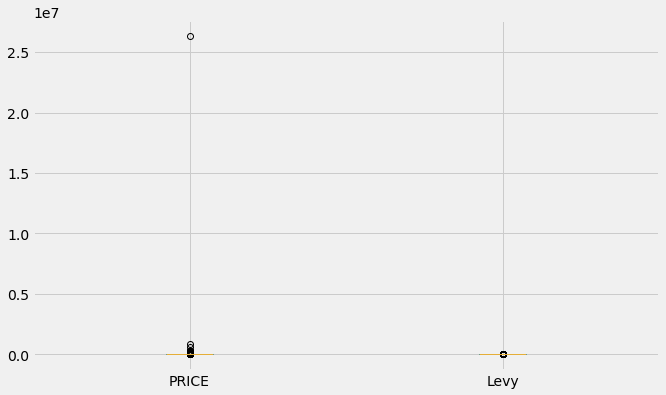

In [16]:
df_.plot.box(y = ['PRICE', 'Levy'], figsize = (10,6))

In [17]:
year_price = df_.groupby(by = 'Prod. year')
year_price = year_price.mean()
year_price = year_price[['PRICE']].reset_index()
year_price.head()

,Prod. year,PRICE
0,1939,171.333333
1,1943,119172.000000
2,1947,150.000000
3,1953,17735.250000
4,1957,7527.000000


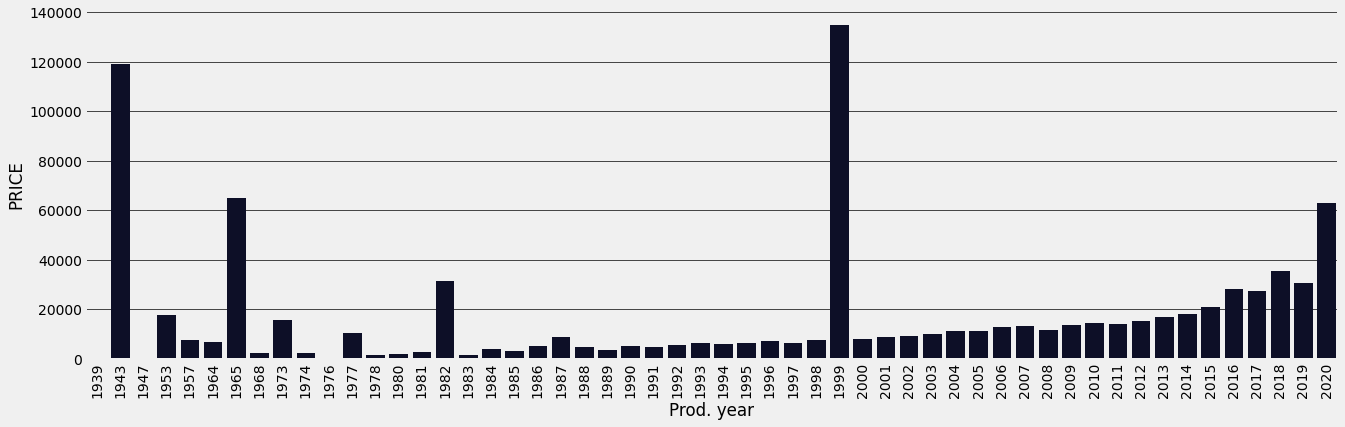

In [18]:
plt.figure(figsize = (20,6))
ax = sns.barplot(x = 'Prod. year', y = 'PRICE', data = year_price, color = '#080c2c', alpha = 1)
plt.tick_params(axis = 'x', rotation = 90)
plt.grid(axis = 'x', lw = 0)
plt.grid(axis = 'y', color = 'black', lw = .7)
# ax.bar_label(ax.containers[0])

In [19]:
def props_(column_):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))

    count_ = df_[column_].value_counts()
    count_ = pd.DataFrame(data = count_)
    count_.columns = ['Count']

    sns.countplot(x = column_, data = df_, ax = ax[0], color = '#080c2c')
    ax[0].grid(axis = 'x', lw = 0)
    ax[0].grid(axis = 'y', color = 'black', lw = .7)
    ax[0].bar_label(ax[0].containers[0])

    count_['Count'].plot.pie(ax = ax[1], subplots = True, ylabel = '', textprops = {'color': '#080c2c'}, autopct = "%.1f", cmap = 'nipy_spectral_r')
    plt.tight_layout()
    # return ax

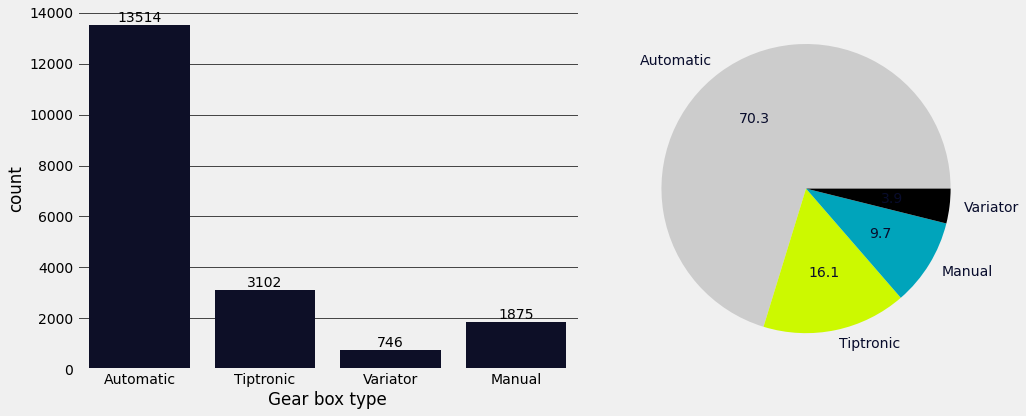

In [20]:
props_(column_ = 'Gear box type')

In [21]:
year_price = df_.groupby(by = 'Color')
year_price = year_price.mean()
year_price = year_price[['PRICE']].reset_index()
year_price.head()

,Color,PRICE
0,Beige,15627.559701
1,Black,18886.917346
2,Blue,33726.850287
3,Brown,19709.636364
4,Carnelian red,15820.927374


[Text(0, 0, '15627.6'),
 Text(0, 0, '18886.9'),
 Text(0, 0, '33726.9'),
 Text(0, 0, '19709.6'),
 Text(0, 0, '15820.9'),
 Text(0, 0, '14678.6'),
 Text(0, 0, '9449.68'),
 Text(0, 0, '19203.4'),
 Text(0, 0, '13008.4'),
 Text(0, 0, '10649.1'),
 Text(0, 0, '8837.38'),
 Text(0, 0, '13553.3'),
 Text(0, 0, '15091.8'),
 Text(0, 0, '14079'),
 Text(0, 0, '18204.3'),
 Text(0, 0, '20666.6')]

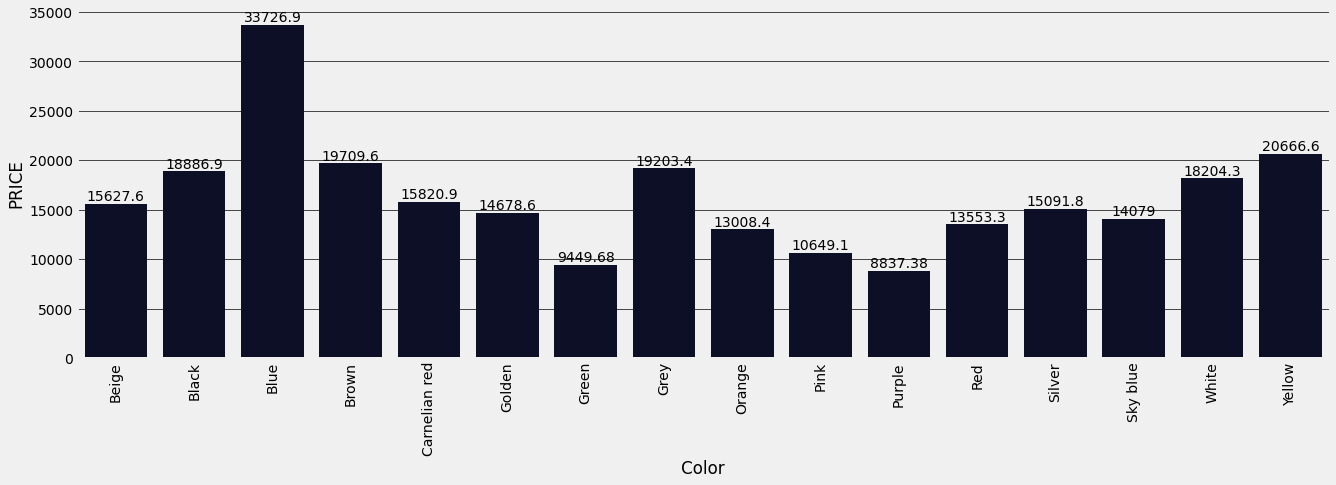

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,6))
sns.barplot(x = 'Color', y = 'PRICE', data = year_price, color = '#080c2c', alpha = 1, ax = ax)
plt.tick_params(axis = 'x', rotation = 90)
plt.grid(axis = 'x', lw = 0)
plt.grid(axis = 'y', color = 'black', lw = .7)
ax.bar_label(ax.containers[0])

<AxesSubplot:xlabel='Levy', ylabel='PRICE'>

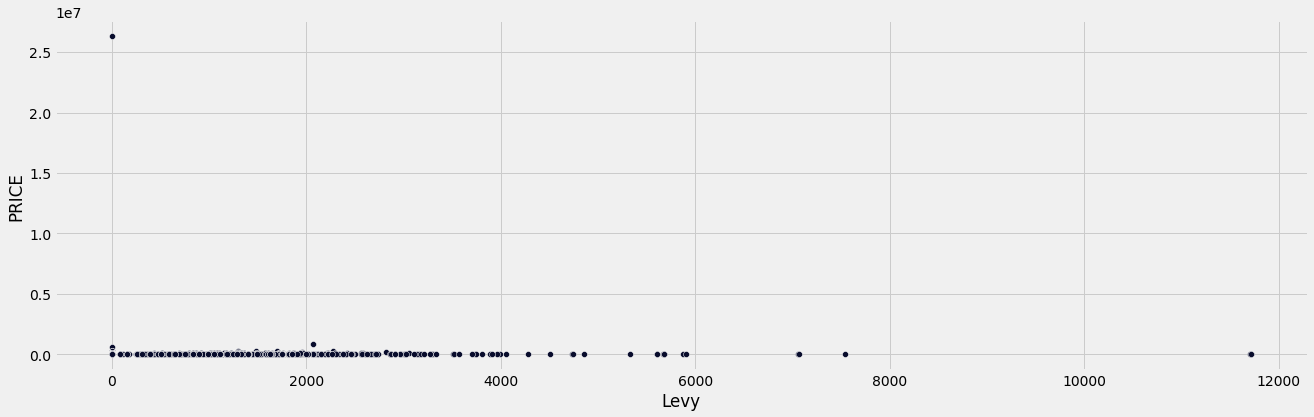

In [23]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,6))
sns.scatterplot(x = 'Levy', y = 'PRICE', data = df_, ax = ax, color = '#080c2c')
# plt.tick_params(axis = 'x', rotation = 90)
# plt.grid(axis = 'x', lw = 0)
# plt.grid(axis = 'y', color = 'black', lw = .7)

In [24]:
corr_ = df_.corr()
corr_ = corr_.sort_values(by = 'PRICE', ascending = False)
corr_.head(5)

,ID,Levy,Prod. year,Cylinders,Airbags,PRICE
PRICE,-0.000844,-0.003701,0.012982,0.007518,-0.012824,1.000000
Prod. year,0.071352,0.364712,1.000000,-0.096797,0.236969,0.012982
Cylinders,-0.039319,0.250950,-0.096797,1.000000,0.176868,0.007518
ID,1.000000,0.102614,0.071352,-0.039319,-0.020527,-0.000844
Levy,0.102614,1.000000,0.364712,0.250950,0.128032,-0.003701


<AxesSubplot:>

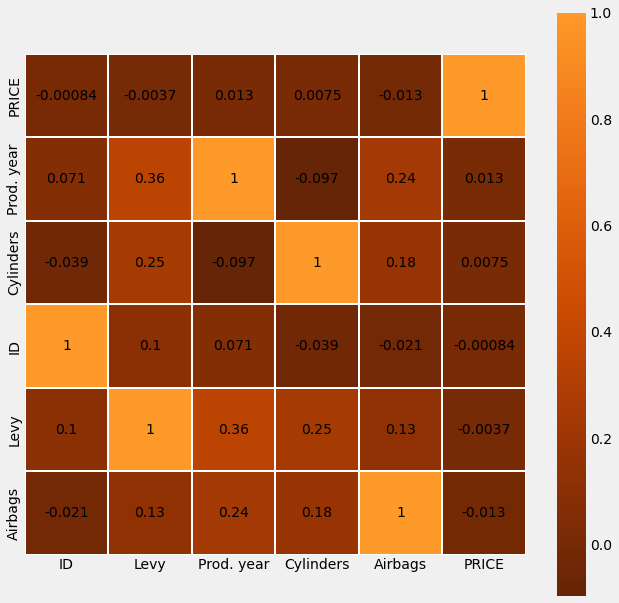

In [25]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))
sns.heatmap(corr_, cmap = 'YlOrBr_r', annot = True, annot_kws = {'color': 'black'}, square = True, center = True, linewidth = .3)

_Feature Selection_

In [26]:
df_ = df_.sort_values('PRICE', ascending = False).reset_index().drop('index', axis = 1)
df_.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,PRICE
0,45812886,0,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999 km,4.0,Manual,Front,02-Mar,Left wheel,Blue,0,26307500
1,45761204,2067,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4,2531 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,0,872946
2,45795524,0,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3 Turbo,0 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12,627220
3,45810285,1694,PORSCHE,911,2016,Coupe,Yes,Petrol,4,8690 km,6.0,Automatic,Rear,02-Mar,Left wheel,Black,12,308906
4,45792307,0,LAND ROVER,Range Rover Vogue,2019,Jeep,Yes,Diesel,3.0 Turbo,4500 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12,297930


In [27]:
df_ = df_.iloc[3:, :]

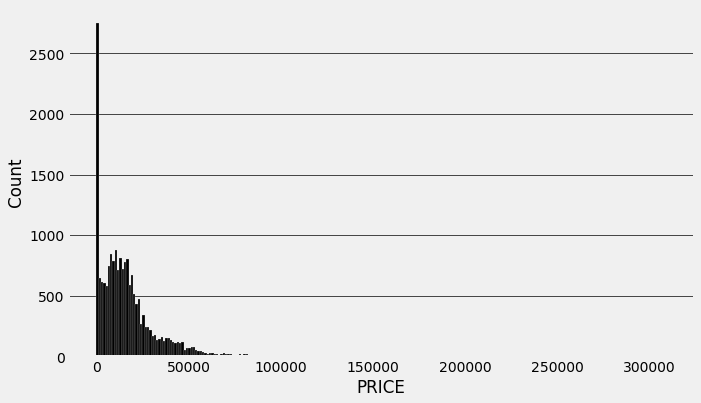

In [28]:
plt.figure(figsize = (10,6))
sns.histplot(x = df_['PRICE'], color = 'black', alpha = 1)
plt.grid(axis = 'x', lw = 0)
plt.grid(axis = 'y', color = 'black', lw = .7)

In [29]:
df_.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,PRICE
3,45810285,1694,PORSCHE,911,2016,Coupe,Yes,Petrol,4,8690 km,6.0,Automatic,Rear,02-Mar,Left wheel,Black,12,308906
4,45792307,0,LAND ROVER,Range Rover Vogue,2019,Jeep,Yes,Diesel,3.0 Turbo,4500 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12,297930
5,45229113,0,MERCEDES-BENZ,AMG GT S,2015,Coupe,Yes,Petrol,4.0 Turbo,20000 km,8.0,Tiptronic,Rear,02-Mar,Left wheel,White,16,297930
6,45760644,2269,BMW,M5 Машина в максимально,2018,Sedan,Yes,Petrol,4.4,13500 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,0,288521
7,45291161,0,LEXUS,LX 570,2018,Jeep,Yes,Petrol,5.7 Turbo,17700 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,10,260296


In [30]:
def engine_volume(annot_):
    if ' ' in annot_:
        return float(annot_.split(' ')[0])
    else:
        return float(annot_)

df_['Engine volume'] = df_['Engine volume'].apply(engine_volume)

In [31]:
def mileage_(annot_):
    return int(annot_.split(' ')[0])

df_['Mileage'] = df_['Mileage'].apply(engine_volume)

In [32]:
# non_numeric_list = []
# diff_ = set(df_.columns).difference(df_._get_numeric_data().columns)
# for col in diff_:
#     non_numeric_list.append(col)

# for i in non_numeric_list:
#     print(f"{i} unique values: {df_[i].unique()}")

In [33]:
category_map = {'Coupe': 0,'Jeep': 1,'Sedan': 2,'Universal': 3,'Pickup': 4,'Minivan': 5,'Goods wagon': 6,
                'Microbus': 7,'Cabriolet': 8,'Hatchback': 9,'Limousine': 10}
doors_map = {'02-Mar': 0,
             '04-May': 1,
             '>5': 2}
fuel_map = {'Petrol': 0,'Diesel': 1,'Hybrid': 2,'Plug-in Hybrid': 3,'LPG': 4,'CNG': 5,'Hydrogen': 6}
wheel_map = {'Left wheel': 0,
             'Right-hand drive': 1}

leather_interior_map = {'Yes': 0,
                        'No': 1}

drive_wheels_map = {'Rear': 0,
                    '4x4': 1,
                    'Front': 2}

gear_box_map = {'Automatic': 0,
                'Tiptronic': 1,
                'Manual': 2,
                'Variator': 3}

manufacturer_map = {'PORSCHE': 0,'LAND ROVER': 2,'MERCEDES-BENZ': 3,'BMW': 4,'LEXUS': 5,'BENTLEY': 6,'TOYOTA': 7,
                    'JAGUAR': 8,'JEEP': 9,'FORD': 10,'HYUNDAI': 11,'HONDA': 12,'MITSUBISHI': 13,'AUDI': 14,'CHEVROLET': 15,
                    'OPEL': 16,'FERRARI': 17,'KIA': 18,'PEUGEOT': 19,'SUZUKI': 20,'VOLKSWAGEN': 21,'MAZDA': 22,'HUMMER': 23,
                    'SSANGYONG':  24,'ASTON MARTIN': 25,'TESLA': 26,'GAZ': 27,'MINI': 28,'CADILLAC': 29,'NISSAN': 30,
                    'SKODA': 31,'ACURA': 32,'SUBARU': 33,'INFINITI': 34,'LINCOLN': 35,'RENAULT': 36,'MASERATI': 37,'GMC': 38,
                    'BUICK': 39, 'DODGE': 40,'CHRYSLER': 41,'VOLVO': 42,'FIAT': 43,'სხვა': 44,'SCION': 45,'CITROEN': 46,
                    'MERCURY': 47,'ALFA ROMEO': 48,'VAZ': 49,'MOSKVICH': 50,'HAVAL': 51,'ISUZU': 52,'SATURN': 53,'DAEWOO': 54,
                    'LANCIA': 55,'DAIHATSU': 56,'GREATWALL': 57,'UAZ': 58,'SAAB': 59,'PONTIAC': 60,'SEAT': 61,'ZAZ': 62,
                    'ROVER': 63,'ROLLS-ROYCE': 64}

color_map = {'Black': 0,'White': 1,'Silver': 2,'Grey': 3,'Blue': 4,'Orange': 5,'Brown': 6,'Carnelian red': 7,
         'Red': 8,'Green': 9,'Yellow': 10,'Beige': 11,'Golden': 12,'Pink': 13,'Sky blue': 14,'Purple': 15}

In [34]:
df_['Manufacturer'] = df_['Manufacturer'].map(manufacturer_map)
df_['Category'] = df_['Category'].map(category_map)
df_['Fuel type'] = df_['Fuel type'].map(fuel_map)
df_['Leather interior'] = df_['Leather interior'].map(leather_interior_map)
df_['Wheel'] = df_['Wheel'].map(wheel_map)
df_['Drive wheels'] = df_['Drive wheels'].map(drive_wheels_map)
df_['Doors'] = df_['Doors'].map(doors_map)
df_['Color'] = df_['Color'].map(color_map)
df_['Gear box type'] = df_['Gear box type'].map(gear_box_map)

In [35]:
def int_cols_(annot_):
    return int(annot_)

df_['Cylinders'] = df_['Cylinders'].apply(int_cols_)
df_['Fuel type'] = df_['Fuel type'].apply(int_cols_)
df_['Engine volume'] = df_['Engine volume'].apply(int_cols_)
df_['Mileage'] = df_['Mileage'].apply(int_cols_)

In [36]:
df_.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,PRICE
3,45810285,1694,0,911,2016,0,0,0,4,8690,6,0,0,0,0,0,12,308906
4,45792307,0,2,Range Rover Vogue,2019,1,0,1,3,4500,8,1,1,1,0,0,12,297930
5,45229113,0,3,AMG GT S,2015,0,0,0,4,20000,8,1,0,0,0,1,16,297930
6,45760644,2269,4,M5 Машина в максимально,2018,2,0,0,4,13500,8,1,1,1,0,0,0,288521
7,45291161,0,5,LX 570,2018,1,0,0,5,17700,8,1,1,1,0,0,10,260296


In [38]:
model_features = pd.get_dummies(df_['Model'], drop_first = True)
model_features.head()

,100,100 NX,1000,1111,114,116,118,"118 2,0",118 M-sport LCI,120,...,Zafira B,i20,i3,i40,iA isti,kona,macan,macan S,tC,xD
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_ = pd.concat([df_, model_features], axis = 1)
df_ = df_.drop('Model', axis = 1)
df_.head()

,ID,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,...,Zafira B,i20,i3,i40,iA isti,kona,macan,macan S,tC,xD
3,45810285,1694,0,2016,0,0,0,4,8690,6,...,0,0,0,0,0,0,0,0,0,0
4,45792307,0,2,2019,1,0,1,3,4500,8,...,0,0,0,0,0,0,0,0,0,0
5,45229113,0,3,2015,0,0,0,4,20000,8,...,0,0,0,0,0,0,0,0,0,0
6,45760644,2269,4,2018,2,0,0,4,13500,8,...,0,0,0,0,0,0,0,0,0,0
7,45291161,0,5,2018,1,0,0,5,17700,8,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df_ = df_.drop('ID', axis = 1)
df_.head()

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,...,Zafira B,i20,i3,i40,iA isti,kona,macan,macan S,tC,xD
3,1694,0,2016,0,0,0,4,8690,6,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,2019,1,0,1,3,4500,8,1,...,0,0,0,0,0,0,0,0,0,0
5,0,3,2015,0,0,0,4,20000,8,1,...,0,0,0,0,0,0,0,0,0,0
6,2269,4,2018,2,0,0,4,13500,8,1,...,0,0,0,0,0,0,0,0,0,0
7,0,5,2018,1,0,0,5,17700,8,1,...,0,0,0,0,0,0,0,0,0,0


_Data Splitting_

In [47]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from skopt.space import Categorical, Real, Integer
from skopt import BayesSearchCV

In [70]:
X = df_.drop('PRICE', axis = 1)
y = df_['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

scale_ = MinMaxScaler(feature_range=(0,1))
scale_.fit(X_train)
X_train = scale_.transform(X_train)
X_test = scale_.transform(X_test)

In [71]:
X.head()

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,...,Zafira B,i20,i3,i40,iA isti,kona,macan,macan S,tC,xD
3,1694,0,2016,0,0,0,4,8690,6,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,2019,1,0,1,3,4500,8,1,...,0,0,0,0,0,0,0,0,0,0
5,0,3,2015,0,0,0,4,20000,8,1,...,0,0,0,0,0,0,0,0,0,0
6,2269,4,2018,2,0,0,4,13500,8,1,...,0,0,0,0,0,0,0,0,0,0
7,0,5,2018,1,0,0,5,17700,8,1,...,0,0,0,0,0,0,0,0,0,0


In [72]:
X.to_csv('../data/processed/features.csv')

In [51]:
X_train.shape, X_test.shape

((14425, 1602), (4809, 1602))

In [53]:
X_train_df = pd.DataFrame(data = X_train, columns = df_.drop('PRICE', axis = 1).columns)
X_test_df = pd.DataFrame(data = X_test, columns = df_.drop('PRICE', axis = 1).columns)
X_train_df.to_csv('../data/processed/train_features.csv')
X_test_df.to_csv('../data/processed/test_features.csv')

In [54]:
scale_.fit(X)
X = scale_.transform(X)

_Training_

In [55]:
xgbr = XGBRegressor()
rfr = RandomForestRegressor()

alg_ = [xgbr, rfr]

In [56]:
# for i in alg_:
    # cv = KFold(n_splits=4,
    #            random_state=42,
    #            shuffle=True)
#     result_ = cross_val_score(estimator = i,
#                               X = X,
#                               y = y,
#                               cv = cv,
#                               scoring = 'neg_mean_squared_error')
#     result = np.mean(result_)
#     result_ = np.sqrt(-result)

#     if i == xgbr:
#         print(f"XGBRegressor Root Mean Squared Error: {result_}")
#     else:
#         print(f"Random Forest Root Mean Squared Error: {result_}")

XGBRegressor Root Mean Squared Error: 9994.370897704026
Random Forest Root Mean Squared Error: 9467.583260942696


In [ ]:
# Guassian Process

# cv = KFold(n_splits=4,
#            random_state=42,
#            shuffle=True)
# clf = BayesSearchCV(estimator=xgbr,
#                     search_spaces = {
#                                      "learning_rate": Real(0.01, 1),
#                                      "max_depth": Integer(2, 10),
#                                      "n_estimators": Integer(100, 350)
#                                     },
#                     n_iter = 2,
#                     optimizer_kwargs={"base_estimator":"GP",
#                         "n_initial_points":10,
#                         "initial_point_generator":"random",
#                         "acq_func":"EI",
#                         "acq_optimizer":"auto",
#                         "n_jobs":-1,
#                         "random_state":0,
#                         "acq_func_kwargs": {"xi":0.01}
#                     },
#                     # random_state = 0,
#                     scoring = 'neg_mean_squared_error', cv = cv,
#                     n_jobs=-1, refit = True)
# clf.fit(X, y)
# print(clf.best_params_)


In [62]:
rfr.fit(X_train, y_train)
preds_ = rfr.predict(X_test)

_evaluate_

<AxesSubplot:ylabel='PRICE'>

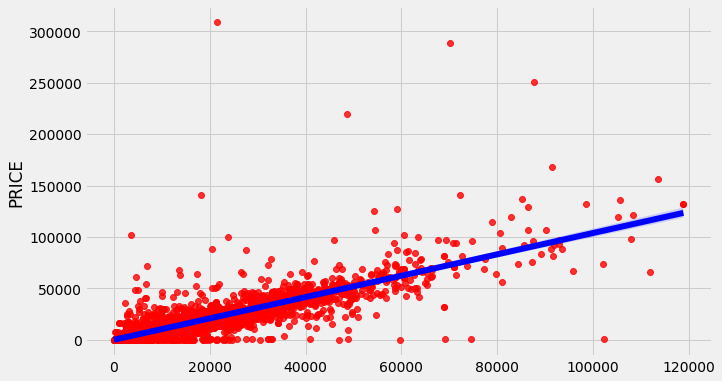

In [68]:
plt.figure(figsize = (10,6))
sns.regplot(x = preds_, y = y_test, line_kws = {'color': 'blue'}, scatter_kws = {'color': 'red'})

In [66]:
error_ = mean_squared_error(y_true = y_test, y_pred = preds_)
print(np.sqrt(error_))

10201.631813638149


In [74]:
joblib.dump(rfr, '../models/model_.joblib')

['../models/model_.joblib']

In [78]:
cd ..

c:\Users\Ayo Agbaje\Desktop\ML-Pipelines


In [94]:
import src
from src.stages.data_load import data_load

In [95]:
data_load()

FileNotFoundError: [Errno 2] No such file or directory: '../params.yaml'